# OilyGiant mining company project

Introduction: 

For this project I am working for OilyGiant mining company and the task is to find the next best region for a new well. I will pick the model and the oil wells with the highest estimated value and the region with highest total profit to find the next best region.

Downloading libraries and datasets to prepare the data in the cells below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
try:
    oil_0 = pd.read_csv("/datasets/geo_data_0.csv")
except FileNotFoundError:
    oil_0 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv')

oil_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [3]:
try:
    oil_1 = pd.read_csv("/datasets/geo_data_1.csv")
except FileNotFoundError:
    oil_1 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv')

oil_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [4]:
try:
    oil_2 = pd.read_csv("/datasets/geo_data_2.csv")
except FileNotFoundError:
    oil_2 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv')

oil_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [3]:
oil_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [4]:
oil_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [5]:
oil_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


showing information of the dataset and if there is any duplicates in the cells below.

In [6]:
print(oil_0.head())
print(oil_0.isna().sum())
print(oil_0.info())
print(oil_0.describe())


      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.5

In [7]:
print(oil_1.head())
print(oil_1.isna().sum())
print(oil_1.info())
print(oil_1.describe())

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.7965

In [8]:
print(oil_2.head())
print(oil_2.isna().sum())
print(oil_2.info())
print(oil_2.describe())

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.4

In [9]:
duplicate_count_0 = oil_0.duplicated().sum()

print(duplicate_count_0)

0


In [10]:
duplicate_count_1 = oil_1.duplicated().sum()

print(duplicate_count_1)

0


In [11]:
duplicate_count_2 = oil_2.duplicated().sum()

print(duplicate_count_2)

0


In [12]:
duplicates = oil_0[oil_0.duplicated(subset=['id'], keep=False)]

print(duplicates)

oil_0.drop_duplicates(subset='id', keep='first', inplace=True)

          id        f0        f1         f2     product
931    HZww2  0.755284  0.368511   1.863211   30.681774
1364   bxg6G  0.411645  0.856830  -3.653440   73.604260
1949   QcMuo  0.506563 -0.323775  -2.215583   75.496502
3389   A5aEY -0.039949  0.156872   0.209861   89.249364
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
16633  fiKDv  0.157341  1.028359   5.585586   95.817889
21426  Tdehs  0.829407  0.298807  -0.049563   96.035308
41724  bxg6G -0.823752  0.546319   3.630479   93.007798
42529  AGS9W  1.454747 -0.479651   0.683380  126.370504
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
60140  TtcGQ  0.569276 -0.104876   6.440215   85.350186
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
64022  74z30  0.741456  0.459229   5.153109  140.771492
66136  74z30  1.084962 -0.312358   6.990771  127.643327
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
89582  bsk9y  0.398908 -0.400253  10.122376  163

In [13]:
duplicates = oil_1[oil_1.duplicated(subset=['id'], keep=False)]

print(duplicates)

oil_1.drop_duplicates(subset='id', keep='first', inplace=True)

          id         f0         f1        f2     product
1305   LHZR0  11.170835  -1.945066  3.002872   80.859783
2721   bfPNe  -9.494442  -5.463692  4.006042  110.992147
5849   5ltQ6  -3.435401 -12.296043  1.999796   57.085625
41906  LHZR0  -8.989672  -4.286607  2.009139   57.085625
47591  wt4Uk  -9.091098  -8.109279 -0.002314    3.179103
82178  bfPNe  -6.202799  -4.820045  2.995107   84.038886
82873  wt4Uk  10.259972  -9.376355  4.994297  134.766305
84461  5ltQ6  18.213839   2.191999  3.993869  107.813044


In [14]:
duplicates = oil_2[oil_2.duplicated(subset=['id'], keep=False)]

print(duplicates)

oil_2.drop_duplicates(subset='id', keep='first', inplace=True)

          id        f0        f1        f2     product
11449  VF7Jo  2.122656 -0.858275  5.746001  181.716817
28039  xCHr8  1.633027  0.368135 -2.378367    6.120525
43233  xCHr8 -0.847066  2.101796  5.597130  184.388641
44378  Vcm5J -1.229484 -2.439204  1.222909  137.968290
45404  KUPhW  0.231846 -1.698941  4.990775   11.716299
49564  VF7Jo -0.883115  0.560537  0.723601  136.233420
55967  KUPhW  1.211150  3.176408  5.543540  132.831802
95090  Vcm5J  2.587702  1.986875  2.482245   92.327572


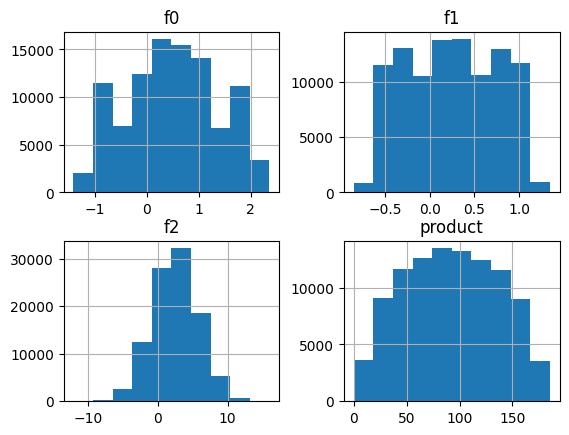

In [15]:
oil_0.hist()
plt.show()

From the distribution charts we can say that on F0 it was topped off at around 16,000 points at around 0.5 and the lowest is at less than -1 at 2,000 points.
F1 tops off at 0.4 at around 14,000 points and lowest at -0.3 at 1,000 points.
F2 tops off at 5 with 31,000 points and lowest at -3 with 0 points.
Product has the highest at 70 units for $14,000.

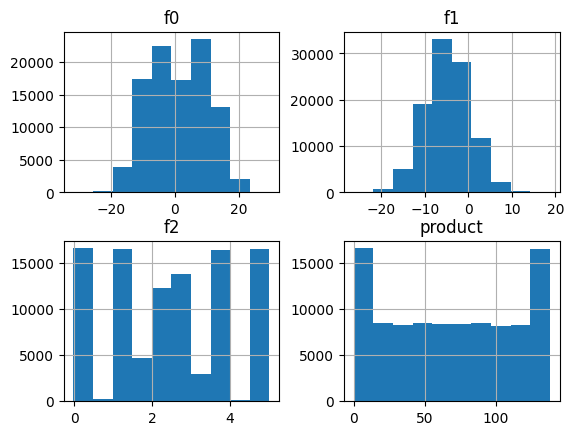

In [16]:
oil_1.hist()
plt.show()

F0 tops off at 10 with 24,000 points and lowest at 20 with 2,000.
F1 tops off at -5 with 38,000 points and lowest at 10 with 0.
F2 tops off at 0 with 18,000 points and lowest at 3.5 with 3,000.
Product has the highest with 10 units with $18,000.

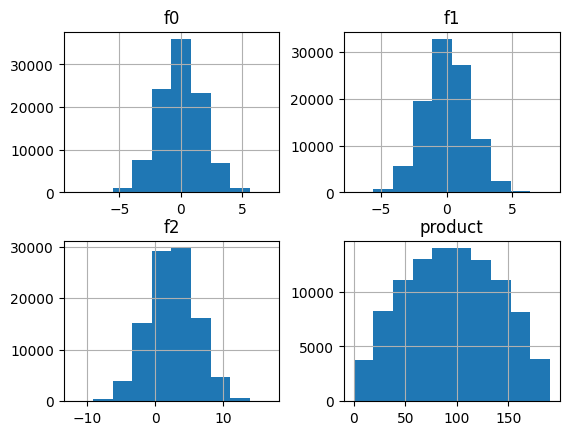

In [17]:
oil_2.hist()
plt.show()

F0 tops off at 0 with 38,000 points and lowest at 5 with 1.
F1 tops off at 0 with 38,000 points and lowest at -5 with 1.
F2 tops off at 5 with 30,000 points and lowest at -6 with 1.
Product has the highest in 100 units with $14,000.

splitting the data to use in the Linear Regression model and tested them in the cell below.

In [18]:
saved_predictions_valid = []
saved_target_valid = []

for oil, name in [(oil_0, "oil_0"), (oil_1, "oil_1"), (oil_2, "oil_2")]:
    target = oil['product']
    features = oil.drop(['id', 'product'], axis=1)

    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state = 12345)
    
    scaler = StandardScaler()
    scaler.fit(features_train)
    scaler.transform(features_train, copy=False)
    scaler.transform(features_valid, copy=False)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    predictions_valid = model.predict(features_valid)
    
    saved_predictions_valid.append(predictions_valid)
    saved_target_valid.append(target_valid)

    rmse = mean_squared_error(target_valid, predictions_valid) ** 0.5

    print('')
    print(name, "has an average volume of predicted reserves of", round(predictions_valid.mean(), 2), "thousand barrels and a RMSE of", round(rmse, 2))


oil_0 has an average volume of predicted reserves of 92.79 thousand barrels and a RMSE of 37.85

oil_1 has an average volume of predicted reserves of 69.18 thousand barrels and a RMSE of 0.89

oil_2 has an average volume of predicted reserves of 94.87 thousand barrels and a RMSE of 40.08


The 3 datasets were train test split with a 75:25 ratio which means 75% training dataset and 25% validation dataset.
Then Standard scaler was used to standardize the data then the Linear Regression model was used.
From the results it appears that oil 0 and oil 2 are similar to each other.
Oil 1 has the lowest RMSE so it indicates that it is a better fit.

preparing for profit calculation in the 2 cells below.

In [19]:
points = 500
oil_wells = 200
budget = 100000000
price = 4.5
revenue_1000_barrels = 4500
unit = 1000
risk = 0.025
break_even_vol = budget / oil_wells / revenue_1000_barrels
print("Volume of reserves sufficient for developing a new well without losses:", round(break_even_vol, 2))

Volume of reserves sufficient for developing a new well without losses: 111.11


This equation was used for developing a new well which leads to be 111.11 thousand barrels. This number is higher than the averge predicted reserves of all 3 regions.

In [20]:
for oil, name in [(oil_0, "oil_0"), (oil_1, "oil_1"), (oil_2, "oil_2")]:
    print("Average volume of reserves in", name, ":", oil['product'].mean())

Average volume of reserves in oil_0 : 92.49968421774354
Average volume of reserves in oil_1 : 68.82391591804064
Average volume of reserves in oil_2 : 94.99834211933378


This is the average mean number for the average volume of reserves from the product of oil well 0,1,and 2.

Writing a function to calculate profit from a set of selected oil wells and model predictions in the 2 cells below.

In [21]:
def profit(target, predictions):
    preds_sorted = pd.Series(predictions, index=target.index).sort_values(ascending=False)
    selected = target[preds_sorted.index][:200]
    
    return selected.sum(), selected.sum() * revenue_1000_barrels - budget

In [22]:
for num in range(3):
    x, y = profit(saved_target_valid[num], saved_predictions_valid[num])
    print(f"--- oil_{num} ---")
    print("Target reserve sum:", round(x, 2), "thousand barrels")
    print('Profit:', round(y, 2), "USD")
    print("")

--- oil_0 ---
Target reserve sum: 29700.42 thousand barrels
Profit: 33651872.38 USD

--- oil_1 ---
Target reserve sum: 27589.08 thousand barrels
Profit: 24150866.97 USD

--- oil_2 ---
Target reserve sum: 27780.63 thousand barrels
Profit: 25012838.53 USD



Calculated risks and profits for each region in the cell below.

In [23]:
state = np.random.RandomState(12345)

for num in range(3):
    values = []
    for i in range(1000):
        subsample = saved_target_valid[num].sample(n=500, replace=True, random_state=state)
        preds_subsample = pd.Series(saved_predictions_valid[num], index=saved_target_valid[num].index)[subsample.index]
        target.reset_index(drop=True)
        values.append(profit(subsample, preds_subsample)[1])
    
    values = pd.Series(values)
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    loss = round(values.loc[lambda x : x < 0].count() / len(values) * 100, 2)

    print(f"--- oil_{num} ---")
    print("Average profit:", values.mean())
    print("2.5% percentile:", lower)
    print("97.5% percentile:", upper)
    print("Risk of losses:", loss)
    print("")

--- oil_0 ---
Average profit: 4094280.38621436
2.5% percentile: -1315360.2870166434
97.5% percentile: 9443955.827546729
Risk of losses: 7.1

--- oil_1 ---
Average profit: 5364001.994351031
2.5% percentile: 1129542.4712370117
97.5% percentile: 9985041.566468805
Risk of losses: 0.3

--- oil_2 ---
Average profit: 3394780.3419779968
2.5% percentile: -2240892.217440757
97.5% percentile: 8470675.876863923
Risk of losses: 11.8



Conclusion:

The Bootstrapping technique was used to analyze potential profits and risks.

The 3 datasets were train test split with a 75:25 ratio which means 75% training dataset and 25% validation dataset.
Then Standard scaler was used to standardize the data then the Linear Regression model was used.
From the results it appears that oil 0 and oil 2 are similar to each other.
Oil 1 has the lowest RMSE so it indicates that it is a better fit.

Algebra equation was used for developing a new well which leads to be 111.11 thousand barrels. This number is higher than the averge predicted reserves of all 3 regions.

The regions oil 0 and oil 2 have risk factor higher than the risk cap requirement of 2.5%. 

So regions oil 0 and oil 2 cannot be considered for high loss risk.

The region represented as oil 1 is the best region so far for the development of oil wells since it shows a profit of $5,364,001.99 and the risk of losses is 0.3%.